<a href="https://colab.research.google.com/github/abcdise/master_thesis/blob/main/MasterThesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
#@title Class of Itô Diffusions
class ItoDiffusion:

  # ==== Public ==== #

  # Constructor
  def __init__(self, drift_parameter, diffusion_parameter, starting_point, starting_time=0):
    self.drift = drift_parameter
    self.diffusion = diffusion_parameter
    self.__starting_point = starting_point
    self.__starting_time = starting_time

  # Access to private attributes
  def get_starting_point(self):
    return self.__starting_point

  def get_starting_time(self):
    return self.__starting_time

  # Public methods
  def simulate(self, solver):
    solver.generate_paths(self)
    return solver.get_paths()





In [25]:
# @title  Numpy Version of Euler Maruyama

class EulerMaruyama:

  # ==== Public ==== #

  # Constructor
  def __init__(self, start_time: float, end_time: float, num_intervals: int, \
               diffusion_dimension=1, num_gaussian_noises=1, num_paths=10000, \
               only_gaussian_noise=True):
    self.__start_time = start_time
    self.__end_time = end_time
    self.__num_intervals = num_intervals
    self.__num_gaussian_noises = num_gaussian_noises
    self.__only_gaussian_noise = only_gaussian_noise
    self.__num_paths = num_paths
    self.__time_intervals = np.linspace(start_time,
                                       end_time,
                                       num=num_intervals+1)
    self.__paths = np.zeros(shape=(num_paths, num_intervals+1, diffusion_dimension))
    self.__diffusion_dimension = diffusion_dimension

  # Set and get private attributes
  def set_start_time(self, start_time):
    self.__start_time = start_time

  def set_end_time(self, end_time):
    self.__end_time = end_time

  def set_num_intervals(self, num_intervals):
    self.__num_intervals = num_intervals

  def set_time_intervals(self, time_intervals):
    self.__time_intervals = time_intervals

  def set_dimension(self, d):
    self.__diffusion_dimension = d

  def set_num_paths(self, num_paths):
    self.__num_paths = num_paths

  def get_num_intervals(self):
    return self.__num_intervals

  def get_time_intervals(self):
    return self.__time_intervals

  def get_start_time(self):
    return self.__start_time

  def get_end_time(self):
    return self.__end_time

  def get_dimension(self):
    return self.__dimension

  def get_num_paths(self):
    return self.__num_paths

  def get_paths(self):
    return self.__paths

  def get_num_gaussian_noise(self):
    return self.__num_gaussian_noises

  def get_gaussian_noise(self):
    return self.__noise

  def show_paths(self, path_indices):
    for i in path_indices:
      plt.plot(self.__time_intervals, self.__paths[i])
    plt.show()


  # Public methods
  def update_noise(self):
    self.__noise = np.random.multivariate_normal(mean=np.zeros(self.__num_gaussian_noises),
                                                 cov=np.eye(self.__num_gaussian_noises),
                                                 size=(self.__num_paths, self.__num_intervals))

    for i in range(self.__num_intervals):
      h = self.__time_intervals[i+1] - self.__time_intervals[i]
      self.__noise[:,i,:] *= np.sqrt(h)

  def generate_paths(self, diffusion):
      for i in range(self.__num_paths):
          self.__paths[i] = self.__generate_path(diffusion, self.__noise[i])



  # ==== Private ==== #

  # Private methods

  # Generate a path of the diffusion
  def __generate_path(self, diffusion, noise):
    ret = np.zeros(shape=(self.__num_intervals+1, self.__diffusion_dimension))
    # Set the starting point of the diffusion
    x_0 = diffusion.get_starting_point()
    if type(x_0) == int:
      ret[0] = x_0 * np.ones(self.__diffusion_dimension)
    else:
      ret[0] = x_0
    # Simulate the following states
    for i in range(1, self.__num_intervals+1):
      h = self.__time_intervals[i] - self.__time_intervals[i-1]
      delta_drift = diffusion.drift(self.__time_intervals[i-1], ret[i-1]) * h
      delta_diffusion = np.matmul(diffusion.diffusion(self.__time_intervals[i-1], ret[i-1]),
                                  noise[i-1])
      ret[i] = ret[i-1] + delta_drift + delta_diffusion
    return ret

In [26]:
#@title Simulation of Langevin Dynamics: An example
# Langevin Dynamics
b = lambda t, x: np.array([-x])
sigma = lambda t, x: np.array([[np.sqrt(2)]])
diffusion = ItoDiffusion(b, sigma, 0)
solver = EulerMaruyama(start_time=0, end_time=1, num_intervals=100)
solver.update_noise()
solver.generate_paths(diffusion)


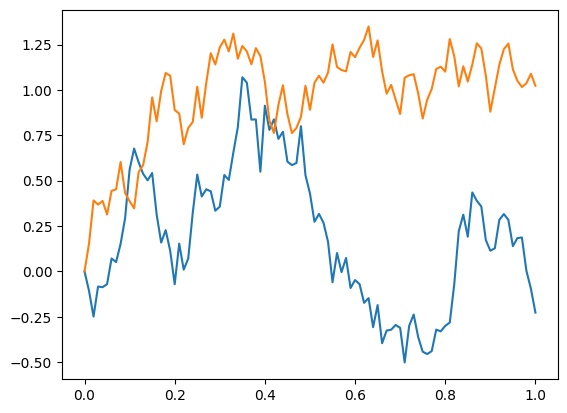

In [27]:
#@title Simulation of Langevin Dynamics: An example
path_indices = [0,3]
solver.show_paths(path_indices)

In [13]:
class TensorflowNeuralNetwork:
  def __init__(self, num_hidden_layers, num_neurons_each_layer, \
               input_dim, output_dim):
    self.__num_hidden_layers = num_hidden_layers
    self.__num_neurons_each_layer = num_neurons_each_layer
    self.__input_dim = input_dim
    self.__output_dim = output_dim
    self.__initialize_model()

  def train_model(algorithm, )

  def getOutput(self):
    return 0

  # ===== Private methods ===== #
  def __initialize_model(self):
    inputs = keras.Input((self.__input_dim,), name='inputs_layer')
    x = keras.layers.Dense(self.__num_neurons_each_layer,
                           activation='sigmoid',
                           name='hidden_layer_1')(inputs)
    for i in range(self.__num_hidden_layers-1):
      x = keras.layers.Dense(self.__num_neurons_each_layer,
                             activation='sigmoid',
                             name=f'hidden_layer_{i+2}')(x)
    outputs = keras.layers.Dense(1,
                                 activation='relu',
                                 name='outputs_layer')(x)
    return keras.Model(inputs=inputs, outputs=outputs, name='neural_network_model')


estimator = TensorflowNeuralNetwork(2, 2, 5, 1)
model = estimator.initialize_model()
model.summary()

Model: "neural_network_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs_layer (InputLayer)   [(None, 5)]               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 2)                 12        
                                                                 
 hidden_layer_2 (Dense)      (None, 2)                 6         
                                                                 
 outputs_layer (Dense)       (None, 1)                 3         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
